서울시 모기발생상황 지표 예측
[코드 예시](https://www.datamanim.com/dataset/03_dataq/q2/mos/main.html)



In [41]:
import pandas as pd
train_x =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/train_x.csv',encoding='euc-kr')
train_y =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/train_y.csv',encoding='euc-kr')
test_x =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/test_x.csv',encoding='euc-kr')
sub    =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/sub.csv', encoding= 'euc-kr')

In [2]:
print(train_x.shape, test_x.shape, train_y.shape, sub.shape)

(1016, 5) (300, 5) (1016, 2) (300, 2)


In [3]:
train_x.head()

,date,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
0,2019-12-31,0.0,-7.9,-10.9,-4.5
1,2019-12-30,0.4,2.7,-5.7,6.8
2,2019-12-29,1.4,3.8,1.1,6.2
3,2019-12-27,0.0,-1.7,-4.6,2.6
4,2019-12-25,0.0,2.0,-2.7,6.6


In [4]:
train_y.head()

,date,mosquito_ratio
0,2019-12-31,5.5
1,2019-12-30,5.5
2,2019-12-29,5.5
3,2019-12-27,5.5
4,2019-12-25,5.5


In [39]:
sub.head()

,date,mosquito_ratio
0,2016-05-01,0
1,2016-05-25,0
2,2016-06-06,0
3,2016-06-09,0
4,2016-06-10,0


In [5]:
for df in [train_x, train_y, test_x]:
    print(df.isnull().sum())
    print('='*50)

date       0
강수량(mm)    0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64
date              0
mosquito_ratio    0
dtype: int64
date       0
강수량(mm)    0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64


In [6]:
# 요약통계량
train_x.describe()

,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,3.566240,14.000886,9.833465,18.924902
std,13.489043,10.988587,11.161832,11.126918
min,0.000000,-14.800000,-17.800000,-10.700000
25%,0.000000,4.300000,0.200000,9.200000
50%,0.000000,16.250000,11.000000,21.700000
75%,0.500000,23.300000,19.425000,28.200000
max,144.500000,33.600000,30.000000,39.600000


* 데이터의 분포를 알아보자 -> 강수량의  경우 75%까지는 0이었다가 max가 144인 치우친 값이다.(robust-scaler)
* scaler이 필요하다

In [7]:
train_x.columns = ['date','rain', 'avg_temp', 'min_temp', 'max_temp']
test_x.columns = ['date','rain', 'avg_temp', 'min_temp', 'max_temp']

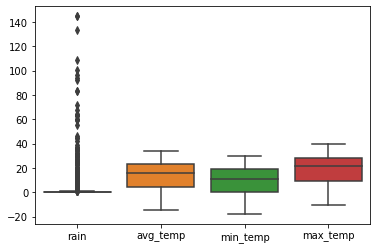

In [8]:
import seaborn as sns
sns.boxplot( data = train_x)

In [9]:
# yyyy-mm-dd에서 년도와 월 데이터 생성
def processing(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    return df.head()

In [10]:
processing(train_x)
processing(test_x)

,date,rain,avg_temp,min_temp,max_temp,year,month
0,2016-05-01,0.0,18.8,12.2,26.0,2016,5
1,2016-05-25,0.0,19.7,15.3,24.4,2016,5
2,2016-06-06,0.0,23.3,20.8,28.4,2016,6
3,2016-06-09,0.0,24.1,17.8,31.3,2016,6
4,2016-06-10,0.0,24.6,20.2,31.3,2016,6


In [11]:
scaled_train = train_x.drop(['date'], axis = 1)
scaled_test = test_x.drop(['date'], axis = 1)

In [13]:
# 전처리 
from sklearn.preprocessing import RobustScaler, StandardScaler
import numpy as np
# R_scaler = RobustScaler()
scaler = StandardScaler()
# train_x = np.array(train_x)
scaler.fit(scaled_train)
X_train =scaler.transform(scaled_train)
X_test = scaler.transform(scaled_test)

In [14]:
from sklearn.model_selection import train_test_split

y = train_y['mosquito_ratio']
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size =0.1, random_state = 123)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(914, 6) (102, 6) (914,) (102,)


In [15]:
# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state = 0)
rf = RandomForestRegressor(random_state = 0)

In [16]:
models = [lr, dt, rf]

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('{0}_mse {1:4f}'.format(model, mean_squared_error(y_test, pred)))
    print('{0}_r2 : {1: 4f}'.format(model, r2_score(y_test, pred)))
    
for m in models:
    fit_model(m, X_train, X_val, y_train, y_val)

LinearRegression()_mse 41308.214722
LinearRegression()_r2 :  0.491221
DecisionTreeRegressor(random_state=0)_mse 17611.562941
DecisionTreeRegressor(random_state=0)_r2 :  0.783084
RandomForestRegressor(random_state=0)_mse 14399.011591
RandomForestRegressor(random_state=0)_r2 :  0.822652


In [33]:
prediction = rf.predict(X_test)

In [37]:
submission = pd.concat([test_x['date'], pd.DataFrame(prediction), sub], axis = 1)